In [1]:
%pip install wfdb
!git clone https://github.com/MIT-LCP/wfdb-python
%cd wfdb-python

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb
from wfdb import processing

Note: you may need to restart the kernel to use updated packages.
c:\Users\jitbh\OneDrive\Documents\GitHub\FinalYearProject---BP-from-ECG-PPG\wfdb-python


fatal: destination path 'wfdb-python' already exists and is not an empty directory.


In [ ]:
# dbs = wfdb.get_dbs()
# display(dbs)

ecg = wfdb.rdheader('a19', pn_dir='challenge-2010/set-a/')

if "ECG I" in ecg.sig_name and "ABP" in ecg.sig_name:
    print("Yes")
else:
    print("No")

In [ ]:

ecg1abp = []
ecg2abp = [] 
ecg12abp = []

for i in range(0,100):

    if i < 10:
        fileNames = "a0{}".format(i)
    else:
        fileNames = "a{}".format(i)

    ecg = wfdb.rdheader(fileNames, pn_dir='challenge-2010/set-a/')
    if "ECG I" in ecg.sig_name and "ABP" in ecg.sig_name:
        if "ECG II" in ecg.sig_name:
            ecg12abp.append(fileNames)
        else:
            ecg1abp.append(fileNames)
    if "ECG II" in ecg.sig_name and "ABP" in ecg.sig_name:
        if "ECG I" in ecg.sig_name:
            ecg12abp.append(fileNames)
        else:
            ecg2abp.append(fileNames)

ecg12abp = list( dict.fromkeys(ecg12abp) )

print("ECG1", ecg1abp)
print("ECG1 size:", len(ecg1abp))
print("ECG2", ecg2abp)
print("ECG2 size:", len(ecg2abp))
print("ECG12", ecg12abp)
print("ECG12 size:", len(ecg12abp))


In [ ]:

ecg12PPGabp = []
ecg12abp = []
ecg2PPGabp = []
ecg2abp = [] 

for i in range(0,100):

    if i < 10:
        fileNames = "c0{}".format(i)
    else:
        fileNames = "c{}".format(i)

    ecg = wfdb.rdheader(fileNames, pn_dir='challenge-2010/set-c/')

    if "II" in ecg.sig_name and "ABP" in ecg.sig_name:
        if "I" in ecg.sig_name:
            if "PLETH" in ecg.sig_name:
                ecg12PPGabp.append(fileNames)
            else:
                ecg12abp.append(fileNames)
        else:
            if "PLETH" in ecg.sig_name:
                ecg2PPGabp.append(fileNames)
            else:
                ecg2abp.append(fileNames)

print("ECG12PPGABP", ecg12PPGabp)
print("ECG12PPGABP size:", len(ecg12PPGabp))
print("ECG2", ecg2abp)
print("ECG2 size:", len(ecg2abp))
print("ECG2PPGABP", ecg2PPGabp)
print("ECG2PPGABP size:", len(ecg2PPGabp))
print("ECG12", ecg12abp)
print("ECG12 size:", len(ecg12abp))


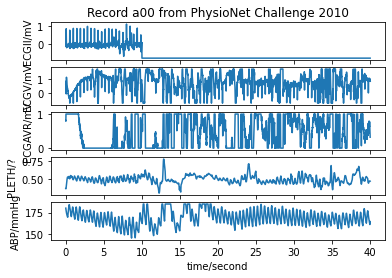

{'record_name': 'ecg-record',
 'n_sig': 5,
 'fs': 125,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECGII', 'ECGV', 'ECGAVR', 'PLETH', 'ABP'],
 'p_signal': array([[-1.00971628e-01,  6.74876348e-01,  8.10173348e-01,
          3.68531080e-01,  1.80312584e+02],
        [-7.38718869e-02,  7.14249262e-01,  7.90591842e-01,
          3.66568985e-01,  1.79921604e+02],
        [-3.94021633e-02,  7.29052554e-01,  9.70643941e-01,
          3.66568985e-01,  1.79335134e+02],
        ...,
        [-7.58620690e-01,  8.59590681e-01,  4.50099699e-01,
          4.76052439e-01,  1.62321346e+02],
        [-7.58620690e-01,  8.44825838e-01,  3.74767416e-01,
          4.75075038e-01,  1.63298797e+02],
        [-7.58620690e-01,  8.49747453e-01,  3.19963638e-01,
          4.74097638e-01,  1.64472352e+02]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['ecg-record.dat',
  'ecg-record.dat',
 

In [2]:
# Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data. Read the files hosted on PhysioNet https://physionet.org/content/challenge-2010/1.0.0/
str = 'a00'
# sig, fields = wfdb.rdsamp(str, channels=[0,1], pn_dir='challenge-2010/set-a/')
sig, fields = wfdb.rdsamp(str, sampfrom=70000, sampto=75000, channels=[1,2,3,4,5], pn_dir='challenge-2010/set-a/')
# Call the gateway wrsamp function, manually inserting fields as function input parameters
fmt = ['16', '16', '16', '16', '16']
units = ['mV', 'mV', 'mV', '?', 'mmHg']
names = ['ECGII', 'ECGV', 'ECGAVR', 'PLETH', 'ABP']
wfdb.wrsamp('ecg-record', fs=125, units=units, sig_name=names, p_signal=sig, fmt=fmt)
# The new file can be read
record = wfdb.rdrecord('ecg-record')
wfdb.plot_wfdb(record=record, plot_sym='true', title='Record ' +  str + ' from PhysioNet Challenge 2010', time_units='seconds') 
display(record.__dict__)
# Convert to seconds
# Snapshot for seconds

In [ ]:
# Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data. Read the files hosted on PhysioNet https://physionet.org/content/challenge-2010/1.0.0/
str = 'a01'
# sig, fields = wfdb.rdsamp(str, channels=[0,1], pn_dir='challenge-2010/set-a/')
sig, fields = wfdb.rdsamp(str, sampfrom=70000, sampto=75000, channels=[0,2,3,4,5], pn_dir='challenge-2010/set-a/')
# Call the gateway wrsamp function, manually inserting fields as function input parameters
fmt = ['16', '16', '16', '16', '16']
units = ['mmHg', '?', 'mV', 'mV', 'mV' ]
names = ['ABP', 'PLETH', 'ECGII', 'ECGV', 'ECGAVR']
wfdb.wrsamp('ecg-record', fs=125, units=units, sig_name=names, p_signal=sig, fmt=fmt)
# The new file can be read
record = wfdb.rdrecord('ecg-record')
wfdb.plot_wfdb(record=record, plot_sym='true', title='Record ' +  str + ' from PhysioNet Challenge 2010', time_units='seconds') 
display(record.__dict__)

In [ ]:
str = 'a02'
# sig, fields = wfdb.rdsamp(str, channels=[0,1], pn_dir='challenge-2010/set-a/')
sig, fields = wfdb.rdsamp(str, sampfrom=70000, sampto=75000, channels=[1,2,3,4,5], pn_dir='challenge-2010/set-a/')
# Call the gateway wrsamp function, manually inserting fields as function input parameters
fmt = ['16', '16', '16', '16', '16']
units = ['?', 'mV', 'mV', 'mV', 'mmHg']
names = ['PLETH', 'ECGII', 'ECGV', 'ECGAVR', 'CVP']
wfdb.wrsamp('ecg-record', fs=125, units=units, sig_name=names, p_signal=sig, fmt=fmt)
# The new file can be read
record = wfdb.rdrecord('ecg-record')
wfdb.plot_wfdb(record=record, plot_sym='true', title='Record ' +  str + ' from PhysioNet Challenge 2010', time_units='seconds') 
display(record.__dict__)
# Convert to seconds
# Snapshot for seconds


# go through all 100 training in Set A, note down what signals they come with. ECGII and ABP


# ECGV is redundant

In [ ]:
str = 'a03'
# sig, fields = wfdb.rdsamp(str, channels=[0,1], pn_dir='challenge-2010/set-a/')
sig, fields = wfdb.rdsamp(str, sampfrom=70000, sampto=75000, channels=[1,2,3,4,5], pn_dir='challenge-2010/set-a/')
# Call the gateway wrsamp function, manually inserting fields as function input parameters
fmt = ['16', '16', '16', '16', '16']
units = ['mV', 'mV', 'mV', '?', 'mmHg']
names = ['ECGII', 'ECGV', 'ECGAVR', 'PLETH', 'ABP']
wfdb.wrsamp('ecg-record', fs=125, units=units, sig_name=names, p_signal=sig, fmt=fmt)
# The new file can be read
record = wfdb.rdrecord('ecg-record')
wfdb.plot_wfdb(record=record, plot_sym='true', title='Record ' +  str + ' from PhysioNet Challenge 2010', time_units='seconds') 
display(record.__dict__)
# Convert to seconds
# Snapshot for seconds

In [ ]:
record = wfdb.rdheader('a10', pn_dir='challenge-2010/set-a/')
display(record.__dict__)

In [ ]:
# Write a WFDB record without using a Record object via the gateway wrsamp function.
# This is the basic way to write physical signals to a WFDB file. 

# Read part of a record from Physionet
sig, fields = wfdb.rdsamp('a10', sampfrom=50000, channels=[0,1], pn_dir='challenge-2010/set-a/')

# Call the gateway wrsamp function, manually inserting fields as function input parameters
wfdb.wrsamp('ecg-record', fs=250, units=['mV', 'mV'], sig_name=['I', 'II'], p_signal=sig, fmt=['16', '16'])

# The new file can be read
record = wfdb.rdrecord('ecg-record')
wfdb.plot_wfdb(record=record, title='Record a10 from PhysioNet Challenge 2010') 
display(record.__dict__)

# ECG processing

In [ ]:
# Demo 19 - Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Load the WFDB record and the physical samples
record = wfdb.rdrecord('a10', pn_dir='challenge-2010/set-a/', sampfrom=0, sampto=10000, channels=[0])

record = wfdb.rdrecord('sample-data/100', sampfrom=0, sampto=10000, channels=[0])


# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record a10")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")